Точность модели: 0.68


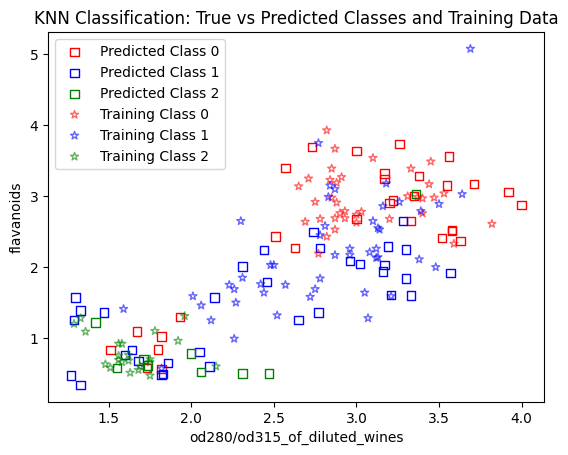

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=21)

# Алгоритм K-ближайших соседей
class KNearestNeighbours:
    def __init__(self, n_neighbours=3):
        self.n_neighbours = n_neighbours

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X_test = np.array(X)
        predictions = [self._predict_single(x_test) for x_test in X_test]
        return np.array(predictions)

    def _predict_single(self, x_test):
        distances = np.sqrt(np.sum((self.X_train - x_test) ** 2, axis=1))
        nearest_indices = np.argsort(distances)[:self.n_neighbours]
        nearest_labels = self.y_train[nearest_indices]
        return np.bincount(nearest_labels).argmax()

# Создаем и обучаем модель
knn = KNearestNeighbours(n_neighbours=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

wine_df_test = pd.DataFrame(X_test, columns=data.feature_names)
wine_df_test['true_class'] = y_test  
wine_df_test['predicted_class'] = y_pred  

wine_df_train = pd.DataFrame(X_train, columns=data.feature_names)
wine_df_train['true_class'] = y_train  

test_visualization_data = wine_df_test[['od280/od315_of_diluted_wines', 'flavanoids', 'predicted_class']]
train_visualization_data = wine_df_train[['od280/od315_of_diluted_wines', 'flavanoids', 'true_class']]

# Разделяем данные по предсказанным классам
pred_c0 = test_visualization_data[test_visualization_data['predicted_class'] == 0]
pred_c1 = test_visualization_data[test_visualization_data['predicted_class'] == 1]
pred_c2 = test_visualization_data[test_visualization_data['predicted_class'] == 2]

# Разделяем обучающие данные по истинным классам
train_c0 = train_visualization_data[train_visualization_data['true_class'] == 0]
train_c1 = train_visualization_data[train_visualization_data['true_class'] == 1]
train_c2 = train_visualization_data[train_visualization_data['true_class'] == 2]

# Визуализируем предсказанные классы тестовой выборки
plt.scatter(pred_c0['od280/od315_of_diluted_wines'], pred_c0['flavanoids'], marker='s', label='Predicted Class 0', facecolors='none', edgecolors='r')
plt.scatter(pred_c1['od280/od315_of_diluted_wines'], pred_c1['flavanoids'], marker='s', label='Predicted Class 1', facecolors='none', edgecolors='b')
plt.scatter(pred_c2['od280/od315_of_diluted_wines'], pred_c2['flavanoids'], marker='s', label='Predicted Class 2', facecolors='none', edgecolors='g')

# Визуализируем обучающую выборку
plt.scatter(train_c0['od280/od315_of_diluted_wines'], train_c0['flavanoids'], marker='*', label='Training Class 0', alpha=0.6, facecolors='none', edgecolors='r')
plt.scatter(train_c1['od280/od315_of_diluted_wines'], train_c1['flavanoids'], marker='*', label='Training Class 1', alpha=0.6, facecolors='none', edgecolors='b')
plt.scatter(train_c2['od280/od315_of_diluted_wines'], train_c2['flavanoids'], marker='*', label='Training Class 2', alpha=0.6, facecolors='none', edgecolors='g')

plt.xlabel('od280/od315_of_diluted_wines')
plt.ylabel('flavanoids')
plt.legend()
plt.title('KNN Classification: True vs Predicted Classes and Training Data')
plt.show()
